# Linear Regression

Linear Regression is a statistical modeling technique used to describe the relationship between the independent (x) variable and the dependent (y) variable.

The basic formula of the Linear Regression model is as follows: 

$$ h_\theta (x) = \theta_0 + \theta_1 x $$

Where:
 - $ h_\theta (x) $: hypothesis
 - $ \theta_0 $: intercept
 - $ \theta_1 $: slope

## Gathering Data

### Importing modules

In [65]:
# Importing modules
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

### Loading the data

In [4]:
# Load data into python
cost_revenue_dirty = pd.read_csv('cost_revenue_dirty.csv')

In [5]:
# Show dataset
cost_revenue_dirty

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


## Data Cleaning

### Extract Necessary Columns

In [8]:
# Get the needed columns
needed_columns = ['Production Budget ($)', 'Worldwide Gross ($)']

# Construct DataFrame that consists only those needed columns
cleaned_df = cost_revenue_dirty[needed_columns].copy()

In [9]:
# Show DataFrame with only the required columns
cleaned_df

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


### Cleaning the dataset

#### Standardize the formatting to let the values be in type float instead of strings 

In [12]:
# Loop through each column
for col in needed_columns:
    # This function ensures that the column is a string; removes commas, parenthesis, and $ signs; and casts it as float 
    cleaned_df[col] = cleaned_df[col].astype(str).str.replace(r'[\$,()]', '', regex=True).astype(float)

In [13]:
cleaned_df

,Production Budget ($),Worldwide Gross ($)
0,110000.0,11000000.0
1,385907.0,0.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
...,...,...
5386,15000000.0,0.0
5387,160000000.0,0.0
5388,175000000.0,0.0
5389,50000000.0,0.0


#### Rename columns to be programming-friendly

In [15]:
# Use snake case for ease of access
cleaned_df = cleaned_df.rename(columns={
                            'Production Budget ($)' : 'production_budget_usd',
                            'Worldwide Gross ($)' : 'worldwide_gross_usd'
                            })

In [16]:
# Show standardized column names
cleaned_df

,production_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
1,385907.0,0.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
...,...,...
5386,15000000.0,0.0
5387,160000000.0,0.0
5388,175000000.0,0.0
5389,50000000.0,0.0


#### Disregard invalid rows

Performing Linear Regression requires clean data that are accurate and precise. Outliers such as 0's in terms of production budget and worldwide gross affects the data analysis. As a result, disregard values with outliers.

In [19]:
# Replace rows with 0.0 to NaN (null)
data_columns = ['production_budget_usd', 'worldwide_gross_usd']

cleaned_df[data_columns] = cleaned_df[data_columns].replace(0.0, np.nan)

# Drop rows with NaN
cleaned_df.dropna(subset=data_columns, how='any', inplace=True)

In [20]:
# Show cleaned_df
cleaned_df

,production_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0
...,...,...
5378,55000000.0,376856949.0
5379,40000000.0,166893990.0
5380,185000000.0,561137727.0
5381,175000000.0,140012608.0


## Data Exploration

In [22]:
cleaned_df.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [23]:
# Create x and y axis

x = DataFrame(cleaned_df, columns=['production_budget_usd'])
y = DataFrame(cleaned_df, columns=['worldwide_gross_usd'])

## Data Visualization

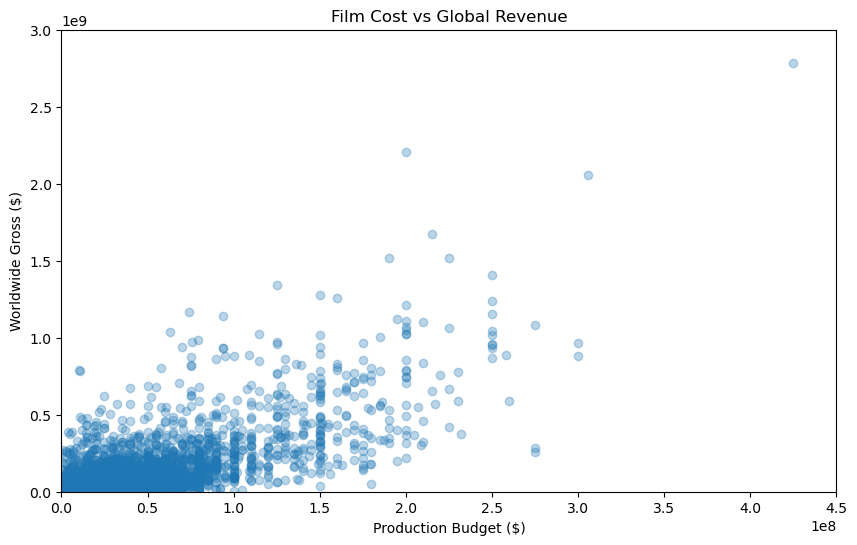

In [25]:
# Set figure size
plt.figure(figsize=(10,6))

# Create a scatter plot using matplotlib
plt.scatter(x, y, alpha=0.3)    # alpha refers to transparency

# Put a title
plt.title('Film Cost vs Global Revenue')

# Put axis labels
plt.xlabel('Production Budget ($)')    # x-axis
plt.ylabel('Worldwide Gross ($)')      # y-axis

# Assign range of visualization
plt.ylim(0, 3e9)    # Set y-axis limit from 0 to 9 Billion
plt.xlim(0, 450e6)  # Set x-axis limit from 0 to 450 Million

plt.show()

## Applying Linear Regression

Linear Regression is a statistical modeling technique used to describe the relationship between the independent (x) variable and the dependent (y) variable.

The basic formula of the Linear Regression model is as follows: 

$$ h_\theta (x) = \theta_0 + \theta_1 x $$

Where:
 - $ h_\theta (x) $: hypothesis
 - $ \theta_0 $: intercept
 - $ \theta_1 $: slope

### Using LinearRegression from Sci-kit Learn

In [29]:
# create a linear regression model instance
regression = LinearRegression()

# Fit the model to the data using x and y
regression.fit(x, y)

LinearRegression()

#### Slope Coefficient

In [31]:
# display the slope coefficient (theta_1)
regression.coef_

array([[3.11150918]])

A slope coefficient of **3.11** indicates that for every dollar spent on production, the predicted return is 3.11 times greater than the production.

#### Intercept

In [34]:
# Display the intercept (theta_0)
regression.intercept_

array([-7236192.72913964])

An intercept of **-7,236,192.73** indicates that having a production budget of 0 USD will lose 7.24M USD.

#### Hypothesis or Predicted Values

In [37]:
# Store the predicted (h_theta(x)) values using the linear regression instance
predicted_values = regression.predict(x)

### Visualizing the Linear Regression Model

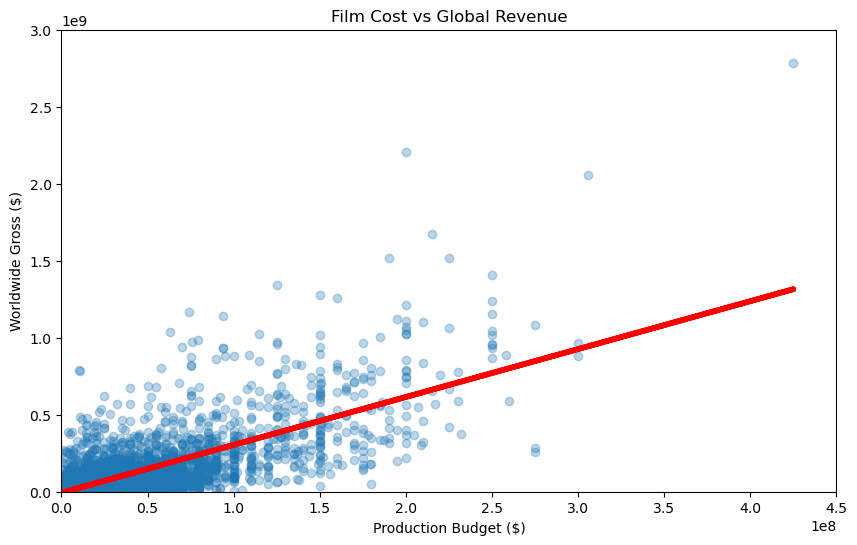

In [39]:
# Set figure size
plt.figure(figsize=(10,6))

# Create a scatter plot using matplotlib
plt.scatter(x, y, alpha=0.3)    # alpha refers to transparency
plt.plot(x, predicted_values, color='red', linewidth=4)

# Put a title
plt.title('Film Cost vs Global Revenue')

# Put axis labels
plt.xlabel('Production Budget ($)')    # x-axis
plt.ylabel('Worldwide Gross ($)')      # y-axis

# Assign range of visualization
plt.ylim(0, 3e9)    # Set y-axis limit from 0 to 9 Billion
plt.xlim(0, 450e6)  # Set x-axis limit from 0 to 450 Million

plt.show()

### Evaluating the Linear Regression Model

#### Using $r^2$ (Goodness of Fit)

In [42]:
# Obtaining r^2
regression.score(x, y)

0.5496485356985729

The goodness of fit indicates that the model explains 54.96% of the variance in the dependent variable, while 45% of the variance is unexplained and may be due to other factors.
  